# 텍스트 빈도 분석 -2 한국어

## 0)필요한 모듈 설치

In [ ]:
!pip install wordcloud

In [ ]:
!pip install xlrd

In [1]:
!pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB 640.0 kB/s eta 0:00:31
    --------------------------------------- 0.4/19.4 MB 4.5 MB/s eta 0:00:05
   - -------------------------------------- 0.9/19.4 MB 6.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.7/19.4 MB 9.6 MB/s eta 0:00:02
   ---- ----------------------------------- 2.2/19.4 MB 9.8 MB/s eta 0:00:02
   ----- ---------------------------------- 2.6/19.4 MB 9.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.8/19.4 MB 9.7 MB/s eta 0:00:02
   ------ --------------------------------- 3.0/19.4 MB 8.6 MB/s eta 0:00:02
   ------ --------------------------------- 3.2/19.4 MB 8.2 MB/s eta 0:00:02
   ------- -------------------------------- 3.5/19.4 MB 8.1 MB/s eta 0:00:02
   ------- -------------------------------- 3.8/19.4 MB 7.6 MB/s eta 0:00:03
   -------- ------------------------------- 4.0/19.4 MB 7.5 MB/s eta 0:00:03
   -

In [ ]:
import nltk
nltk.download()

## 1) 필요한 모듈 import

In [1]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import STOPWORDS, WordCloud

# import pandas as pd
# import glob
# from functools import reduce
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

## 2) 데이터 load

In [7]:
inputFileName = 'etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
data = json.loads(open(inputFileName+'.json', 'r', encoding = 'utf8').read())
data 

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

## 3) 데이터 전처리

In [9]:
message = ''
for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message'])+''
message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [11]:
# 품사 태깅
nlp = Okt()
message_N = nlp.nouns(message)
message_N

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

## 4) 데이터 탐색

In [13]:
count = Counter(message_N)
count

Counter({'차': 23,
         '산업혁명': 22,
         '전자신문': 13,
         '산업': 10,
         '직업': 10,
         '기술': 8,
         '시대': 7,
         '라이브': 7,
         '이번': 6,
         '진흥': 6,
         '포럼': 5,
         '위': 5,
         '일자리': 5,
         '창': 5,
         '조직': 4,
         '터': 4,
         '통해': 4,
         '진행': 4,
         '스파크': 3,
         '미래': 3,
         '변화': 3,
         '사회': 3,
         '기업': 3,
         '로봇': 3,
         '등': 3,
         '노력': 3,
         '서울': 3,
         '시간': 3,
         '방송': 3,
         '대응': 3,
         '주형': 3,
         '철': 3,
         '전자': 3,
         '정보': 3,
         '이슈': 2,
         '소셜': 2,
         '우리': 2,
         '위해': 2,
         '사례': 2,
         '주요': 2,
         '국내': 2,
         '활용': 2,
         '과정': 2,
         '빅데이터': 2,
         '흐름': 2,
         '최고': 2,
         '서비스': 2,
         '영국': 2,
         '한국': 2,
         '경쟁력': 2,
         '제': 2,
         '를': 2,
         '교육': 2,
         '강': 2,
         '만구': 2,
   

In [17]:
word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


In [ ]:
# 검색어로 사용된 '산업혁명' 삭제
del word_count['산업혁명']

word_count

## 5) 결과 시각화

In [19]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

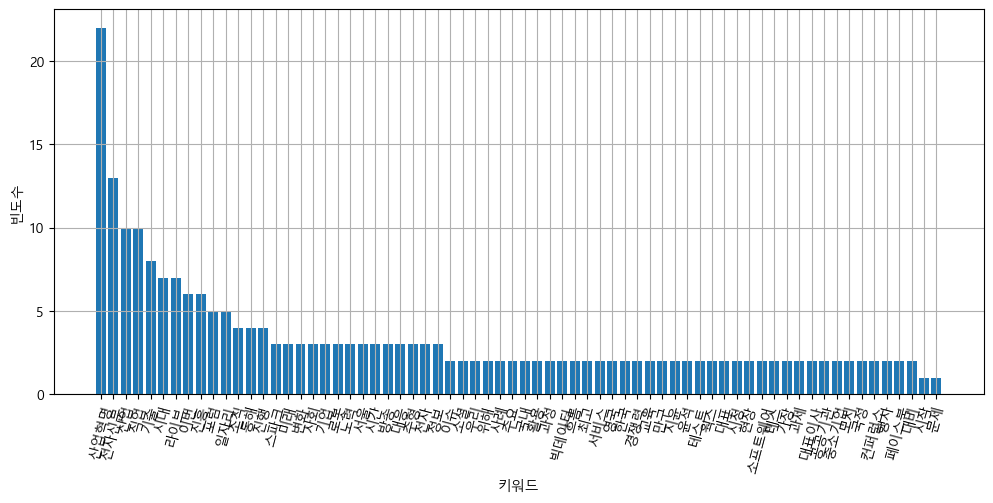

In [22]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

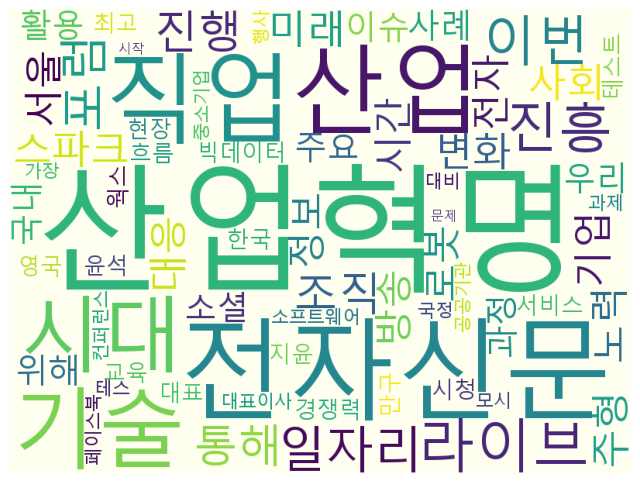

In [24]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [26]:
word_count2 = dict()
for tag, counts in count.most_common(400):    # 상위 400개의 데이터만 사용
    if (len(str(tag)) > 1):
        word_count2[tag] = counts
        print("%s : %d" %(tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1
제기 : 1
혁신 : 1
해결 : 1
이노 : 1
베이 : 1
발굴 : 1
지원 : 1
확산 : 1
도전 : 1
만남 : 1
자리 : 1
직문 : 1
실험 : 1
방향 : 1
생각 : 1
성장 : 1
동력 : 1
평가 : 1
분석 : 1
금융 : 1
전반 : 1
점검 : 1
공통 : 1
간판 : 1
공약 : 1
선도 : 1
도시 : 1
구현 : 1
가상 : 1
화폐 : 1
블록 : 1
체인 : 1
핵심 : 1
대한 : 1
통찰 : 1
알파 : 1
일상 : 1
인공 : 1
지능 : 1
산학 : 1
전문가 : 1
모든 : 1
나라 : 1
경험 : 1
지혜 : 1
비즈니스 : 1
개최 : 1
확보 : 1
해법 : 1
자신 : 1
역량 : 1
모두 : 1
대치동 : 1
센터 : 1
리서치 : 1
수석 : 1
최신 : 1
트렌드 : 1
마련 : 1
보련 : 1
혹시 : 1
우리나라 : 1
전략 : 1
강추 : 1
강점 : 1
분야 : 1
세대 : 1
이동통신 : 1
생태계 : 1
조

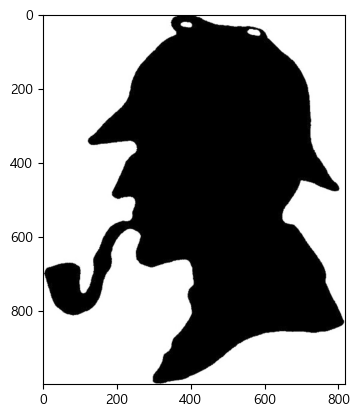

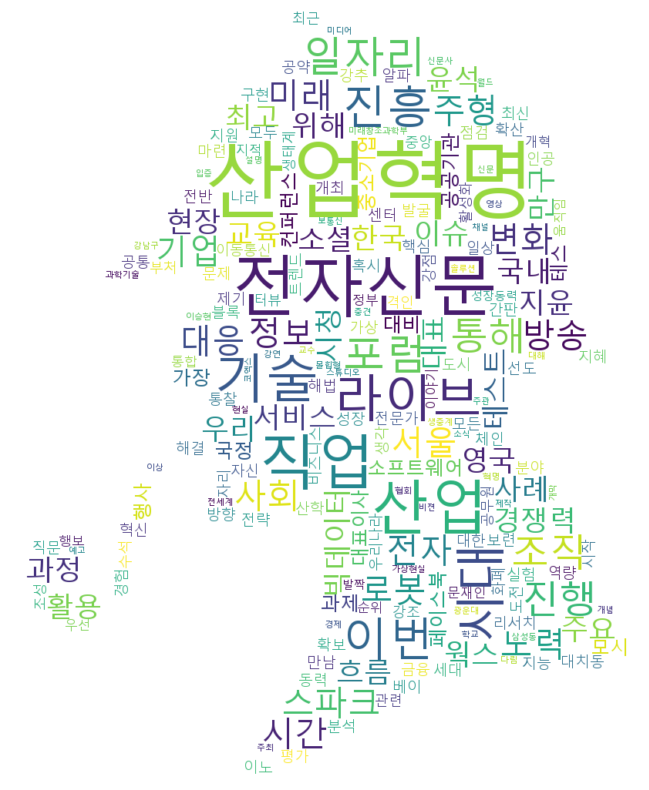

In [40]:
# https://m.blog.naver.com/vi_football/221775297963
from PIL import Image
import numpy as np

icon = Image.open('sherlock.png')    # 마스크가 될 이미지 불러오기 
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path = "c:/Windows/fonts/malgun.ttf", #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask,                                             #마스크설정   
               #contour_color='brown',
               #contour_width=0.1 
)                                    

cloud = wc.generate_from_frequencies(word_count2)                            #사전형태의 데이터

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")